In [49]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

in cabin column more then half of data is missinng so drop it <br>
drop irrelevant columns like passengerId and ticket

In [6]:
df.drop(['Cabin','PassengerId','Ticket','Name'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
le=preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [11]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


**KNN ALGORITHM APPLIED USING LOOPING K VALUE** 

splitting data for testing and training :

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [53]:
def prediction(n):
    y=df['Pclass']
    x=df.drop(columns='Pclass')
    s=[]
    k=[]
    for i in range(1,n):
        print(f"Here k value is {i}")
        knn=KNeighborsClassifier(n_neighbors=i)
        k.append(i)
        X_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model =knn.fit(X_train,y_train)
        ypred=model.predict(x_test)
        score=model.score(x_test,y_test)
        s.append(score)
        print(f"accuracy score when k is {i} is  {score}")
        print("confusionMatrix is :\n",confusion_matrix(y_test,ypred))
        print("-------------------------------------------------------------\n")
    plt.plot(k,s)
    plt.xlabel=("k value")
    plt.ylabel=("accuracy score")
    plt.title=("graph between k value and accuracy score of knn")
    plt.show()

Enter The number of iteration you want for k: 268
Here k value is 1
accuracy score when k is 1 is  0.8497854077253219
confusionMatrix is :
 [[59  6  2]
 [ 5 40  8]
 [ 0 14 99]]
-------------------------------------------------------------

Here k value is 2
accuracy score when k is 2 is  0.8111587982832618
confusionMatrix is :
 [[62  3  2]
 [11 37  5]
 [ 3 20 90]]
-------------------------------------------------------------

Here k value is 3
accuracy score when k is 3 is  0.8240343347639485
confusionMatrix is :
 [[58  5  4]
 [ 7 35 11]
 [ 3 11 99]]
-------------------------------------------------------------

Here k value is 4
accuracy score when k is 4 is  0.8326180257510729
confusionMatrix is :
 [[61  6  0]
 [ 8 38  7]
 [ 3 15 95]]
-------------------------------------------------------------

Here k value is 5
accuracy score when k is 5 is  0.8283261802575107
confusionMatrix is :
 [[60  6  1]
 [ 7 34 12]
 [ 3 11 99]]
-------------------------------------------------------------



confusionMatrix is :
 [[ 60   4   3]
 [  7  12  34]
 [  3   8 102]]
-------------------------------------------------------------

Here k value is 50
accuracy score when k is 50 is  0.7510729613733905
confusionMatrix is :
 [[ 60   4   3]
 [  7  13  33]
 [  4   7 102]]
-------------------------------------------------------------

Here k value is 51
accuracy score when k is 51 is  0.7510729613733905
confusionMatrix is :
 [[ 60   4   3]
 [  7  13  33]
 [  4   7 102]]
-------------------------------------------------------------

Here k value is 52
accuracy score when k is 52 is  0.7467811158798283
confusionMatrix is :
 [[ 59   4   4]
 [  7  13  33]
 [  4   7 102]]
-------------------------------------------------------------

Here k value is 53
accuracy score when k is 53 is  0.7467811158798283
confusionMatrix is :
 [[ 58   4   5]
 [  7  13  33]
 [  4   6 103]]
-------------------------------------------------------------

Here k value is 54
accuracy score when k is 54 is  0.742489270386

confusionMatrix is :
 [[ 54   6   7]
 [  6  10  37]
 [  3   5 105]]
-------------------------------------------------------------

Here k value is 91
accuracy score when k is 91 is  0.7296137339055794
confusionMatrix is :
 [[ 55   5   7]
 [  6  10  37]
 [  3   5 105]]
-------------------------------------------------------------

Here k value is 92
accuracy score when k is 92 is  0.7296137339055794
confusionMatrix is :
 [[ 55   5   7]
 [  6  10  37]
 [  3   5 105]]
-------------------------------------------------------------

Here k value is 93
accuracy score when k is 93 is  0.7381974248927039
confusionMatrix is :
 [[ 55   5   7]
 [  5  11  37]
 [  3   4 106]]
-------------------------------------------------------------

Here k value is 94
accuracy score when k is 94 is  0.7339055793991416
confusionMatrix is :
 [[ 54   6   7]
 [  5  11  37]
 [  3   4 106]]
-------------------------------------------------------------

Here k value is 95
accuracy score when k is 95 is  0.733905579399

accuracy score when k is 134 is  0.7253218884120172
confusionMatrix is :
 [[ 49  12   6]
 [  5  11  37]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 135
accuracy score when k is 135 is  0.7253218884120172
confusionMatrix is :
 [[ 49  12   6]
 [  5  11  37]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 136
accuracy score when k is 136 is  0.7253218884120172
confusionMatrix is :
 [[ 49  12   6]
 [  5  11  37]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 137
accuracy score when k is 137 is  0.721030042918455
confusionMatrix is :
 [[ 49  12   6]
 [  5  10  38]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 138
accuracy score when k is 138 is  0.721030042918455
confusionMatrix is :
 [[ 49  12   6]
 [  5  10  38]
 [  3   1 109]]
-------------------------------------------------------------

Here k 

accuracy score when k is 176 is  0.6738197424892703
confusionMatrix is :
 [[ 47   3  17]
 [  5   1  47]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 177
accuracy score when k is 177 is  0.6695278969957081
confusionMatrix is :
 [[ 46   2  19]
 [  5   1  47]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 178
accuracy score when k is 178 is  0.6695278969957081
confusionMatrix is :
 [[ 46   2  19]
 [  5   1  47]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 179
accuracy score when k is 179 is  0.6695278969957081
confusionMatrix is :
 [[ 46   2  19]
 [  5   1  47]
 [  3   1 109]]
-------------------------------------------------------------

Here k value is 180
accuracy score when k is 180 is  0.6609442060085837
confusionMatrix is :
 [[ 45   2  20]
 [  5   0  48]
 [  3   1 109]]
-------------------------------------------------------------

Here 

confusionMatrix is :
 [[ 43   0  24]
 [  5   0  48]
 [  2   1 110]]
-------------------------------------------------------------

Here k value is 220
accuracy score when k is 220 is  0.6609442060085837
confusionMatrix is :
 [[ 43   0  24]
 [  5   1  47]
 [  2   1 110]]
-------------------------------------------------------------

Here k value is 221
accuracy score when k is 221 is  0.6609442060085837
confusionMatrix is :
 [[ 43   0  24]
 [  5   1  47]
 [  2   1 110]]
-------------------------------------------------------------

Here k value is 222
accuracy score when k is 222 is  0.6609442060085837
confusionMatrix is :
 [[ 43   0  24]
 [  5   1  47]
 [  2   1 110]]
-------------------------------------------------------------

Here k value is 223
accuracy score when k is 223 is  0.6566523605150214
confusionMatrix is :
 [[ 43   0  24]
 [  5   0  48]
 [  2   1 110]]
-------------------------------------------------------------

Here k value is 224
accuracy score when k is 224 is  0.65

accuracy score when k is 262 is  0.6566523605150214
confusionMatrix is :
 [[ 42   0  25]
 [  5   0  48]
 [  2   0 111]]
-------------------------------------------------------------

Here k value is 263
accuracy score when k is 263 is  0.6566523605150214
confusionMatrix is :
 [[ 42   0  25]
 [  5   0  48]
 [  2   0 111]]
-------------------------------------------------------------

Here k value is 264
accuracy score when k is 264 is  0.6566523605150214
confusionMatrix is :
 [[ 42   0  25]
 [  5   0  48]
 [  2   0 111]]
-------------------------------------------------------------

Here k value is 265
accuracy score when k is 265 is  0.6566523605150214
confusionMatrix is :
 [[ 42   0  25]
 [  5   0  48]
 [  2   0 111]]
-------------------------------------------------------------

Here k value is 266
accuracy score when k is 266 is  0.6566523605150214
confusionMatrix is :
 [[ 42   0  25]
 [  5   0  48]
 [  2   0 111]]
-------------------------------------------------------------

Here 

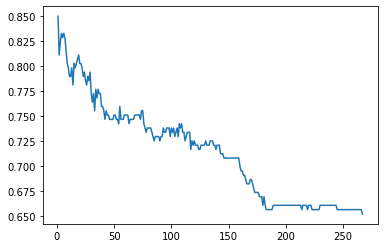

In [55]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)


**CONCLUSION:**<br>**from plot graph we can conclude that this knn has highest accuracy for k=1 and k=5<br>But it is better to prefer k=5 because k=1 is overfitting**